In [1]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(".."))
from common import common
import importlib
importlib.reload(common)

<module 'common.common' from '/Users/suyeetan/Downloads/CS5344_Project/work/common/common.py'>

In [2]:
%run ../datasets/cirrhosis.ipynb

## 1. Understand the Structure of the Data
* Inspect data types of each column
* Check dimensions of the dataset
* View initial records

In [3]:
all_df, main_labels, config = get_cirrhosis_df()

Normal class:  0    C
Name: Status, dtype: object


In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [5]:
all_df.shape

(7905, 20)

In [6]:
all_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


## 2. Data Cleaning Check
* Check for null/missing values
* Check for wrong values
* Drop unnecessary columns

In [7]:
all_df.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

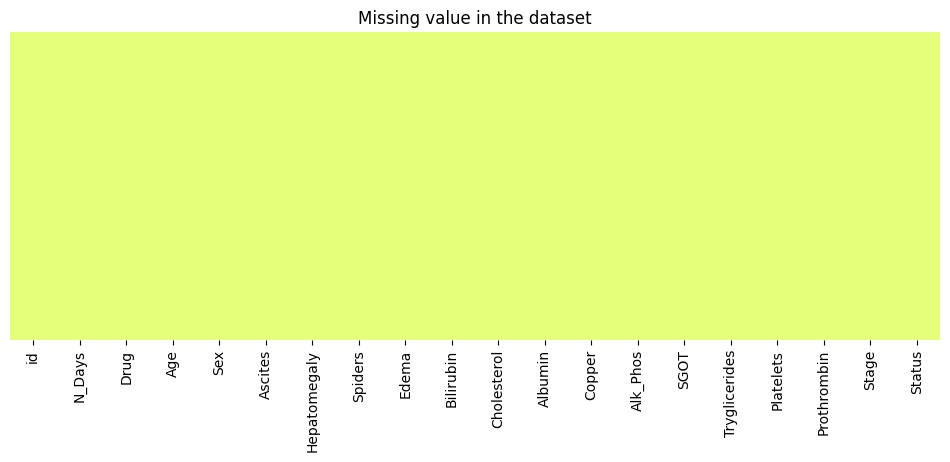

In [8]:
common.show_missing_values(all_df)

In [9]:
for col in all_df.columns:
    print(all_df[col].value_counts())
    print("--------------------------------")

id
0       1
5280    1
5278    1
5277    1
5276    1
       ..
2631    1
2630    1
2629    1
2628    1
7904    1
Name: count, Length: 7905, dtype: int64
--------------------------------
N_Days
1216    117
1434    105
769      83
3445     73
1765     64
       ... 
1870      1
2523      1
1214      1
3492      1
214       1
Name: count, Length: 461, dtype: int64
--------------------------------
Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64
--------------------------------
Age
22369    79
22388    71
20684    71
19060    70
16279    66
         ..
16939     1
13728     1
23111     1
13170     1
18628     1
Name: count, Length: 391, dtype: int64
--------------------------------
Sex
F    7336
M     569
Name: count, dtype: int64
--------------------------------
Ascites
N    7525
Y     380
Name: count, dtype: int64
--------------------------------
Hepatomegaly
Y    4042
N    3863
Name: count, dtype: int64
--------------------------------
Spiders
N    5966
Y  

In [10]:
all_df = all_df.drop(['id'], axis = 1)

In [11]:
columns_to_fill = ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
all_df[columns_to_fill] = all_df[columns_to_fill].fillna(all_df[columns_to_fill].median())
col_to_fill = ['Drug','Ascites','Hepatomegaly','Spiders']     
all_df[col_to_fill] = all_df[col_to_fill].fillna('unknown')

## 3. Summary Statistics
* Mean, median, min, max, percentiles
* Understand data distribution for numerical features
* Check for outliers

In [12]:
all_df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


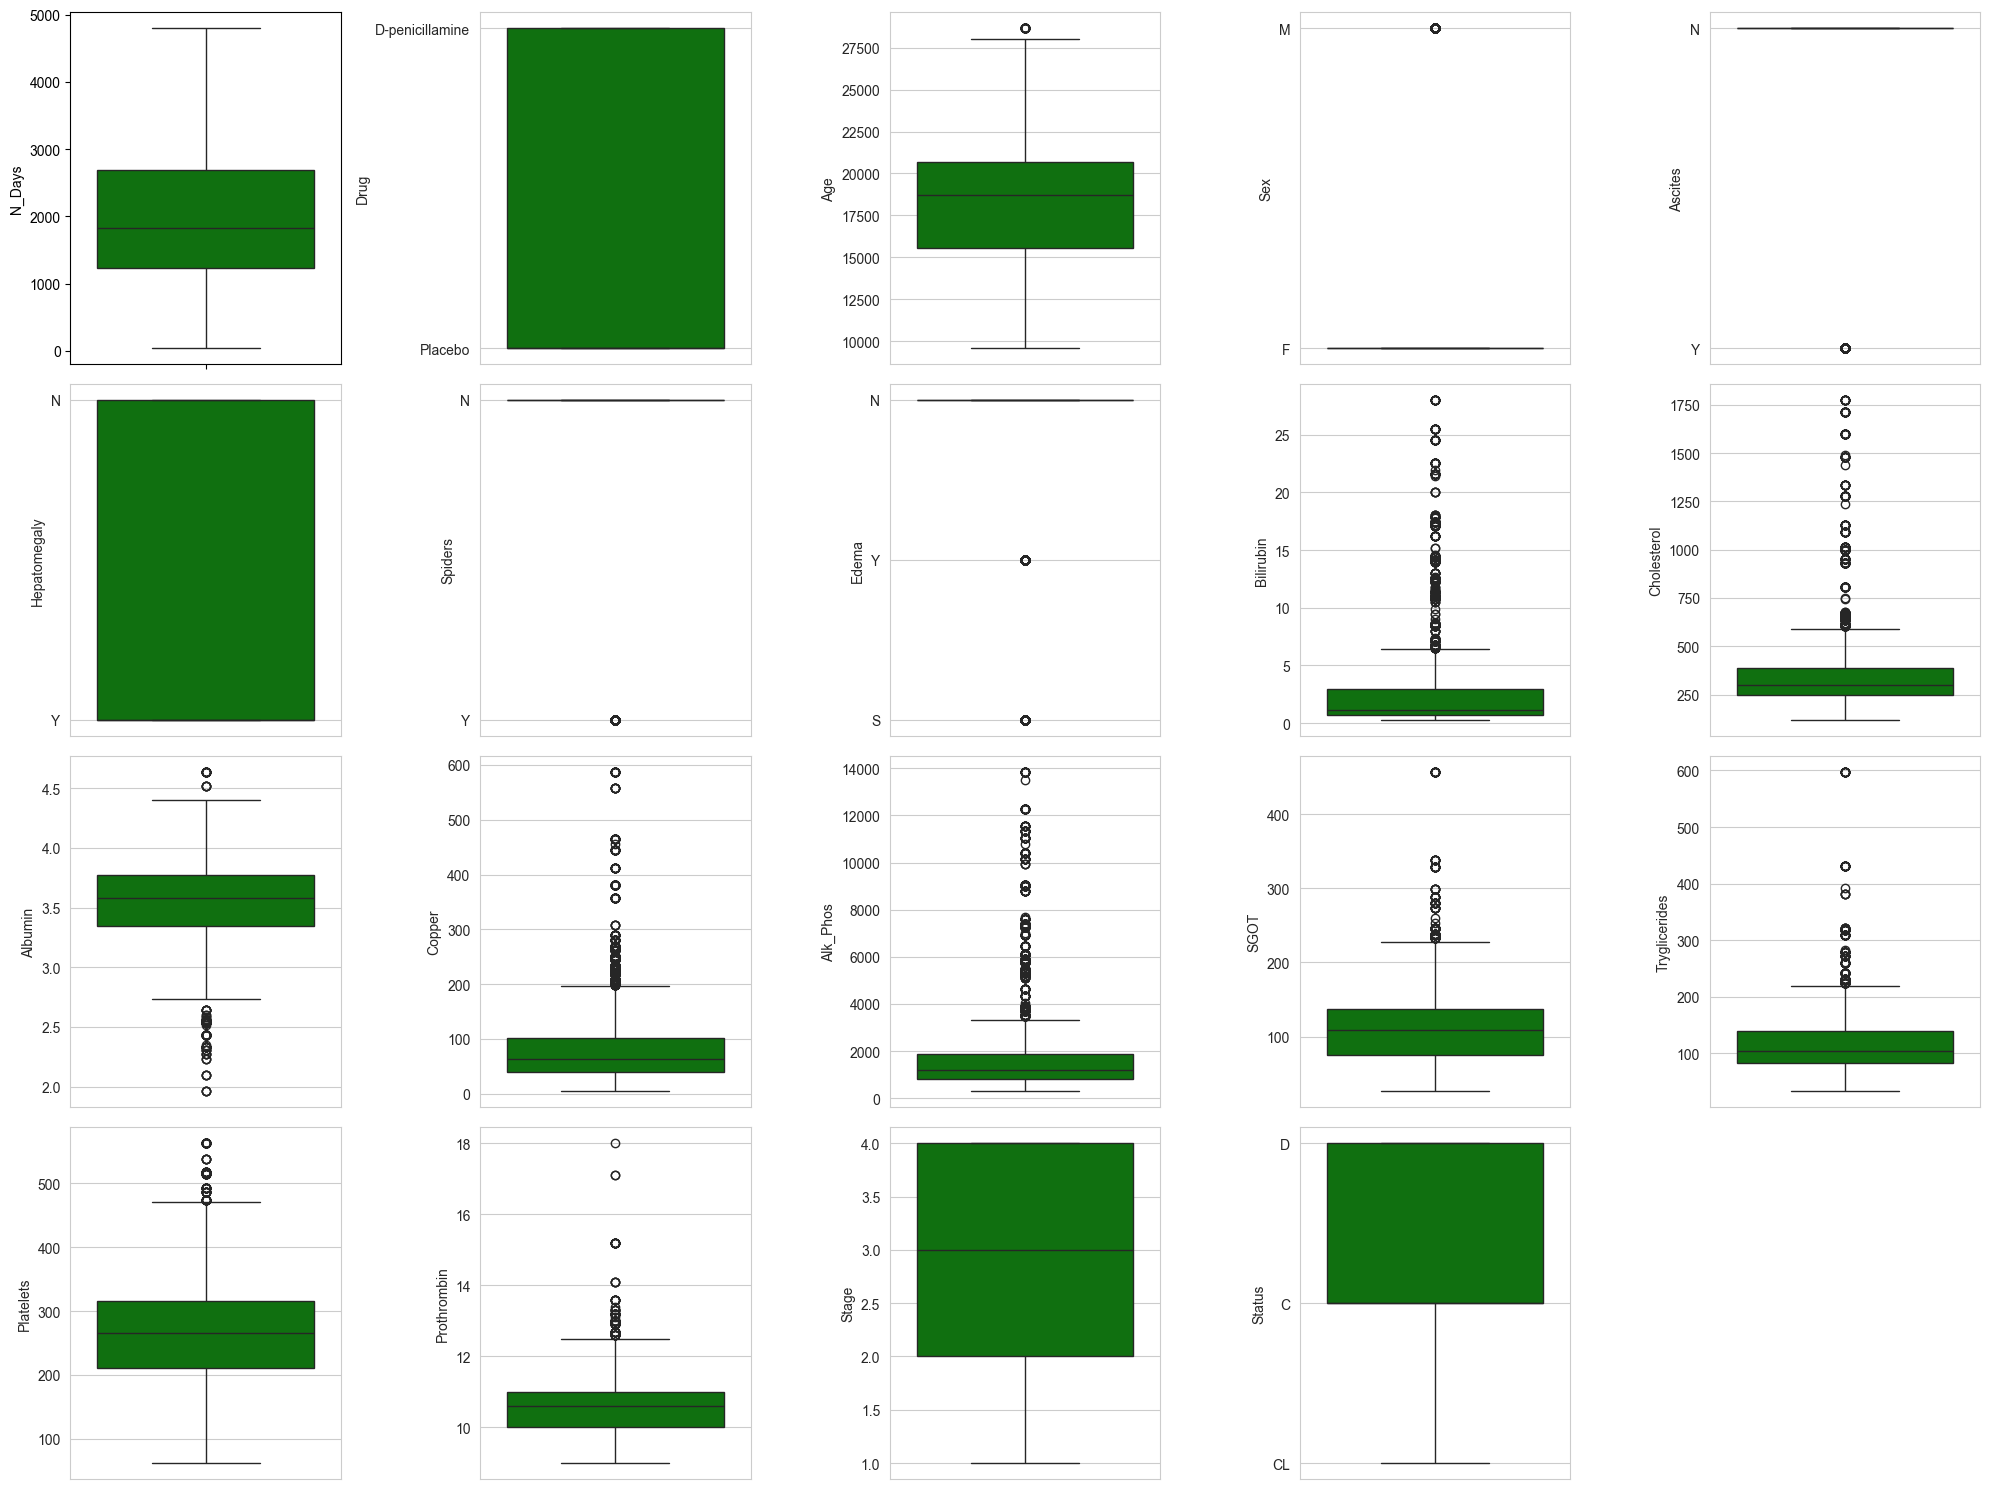

In [13]:
common.show_boxplots(all_df)

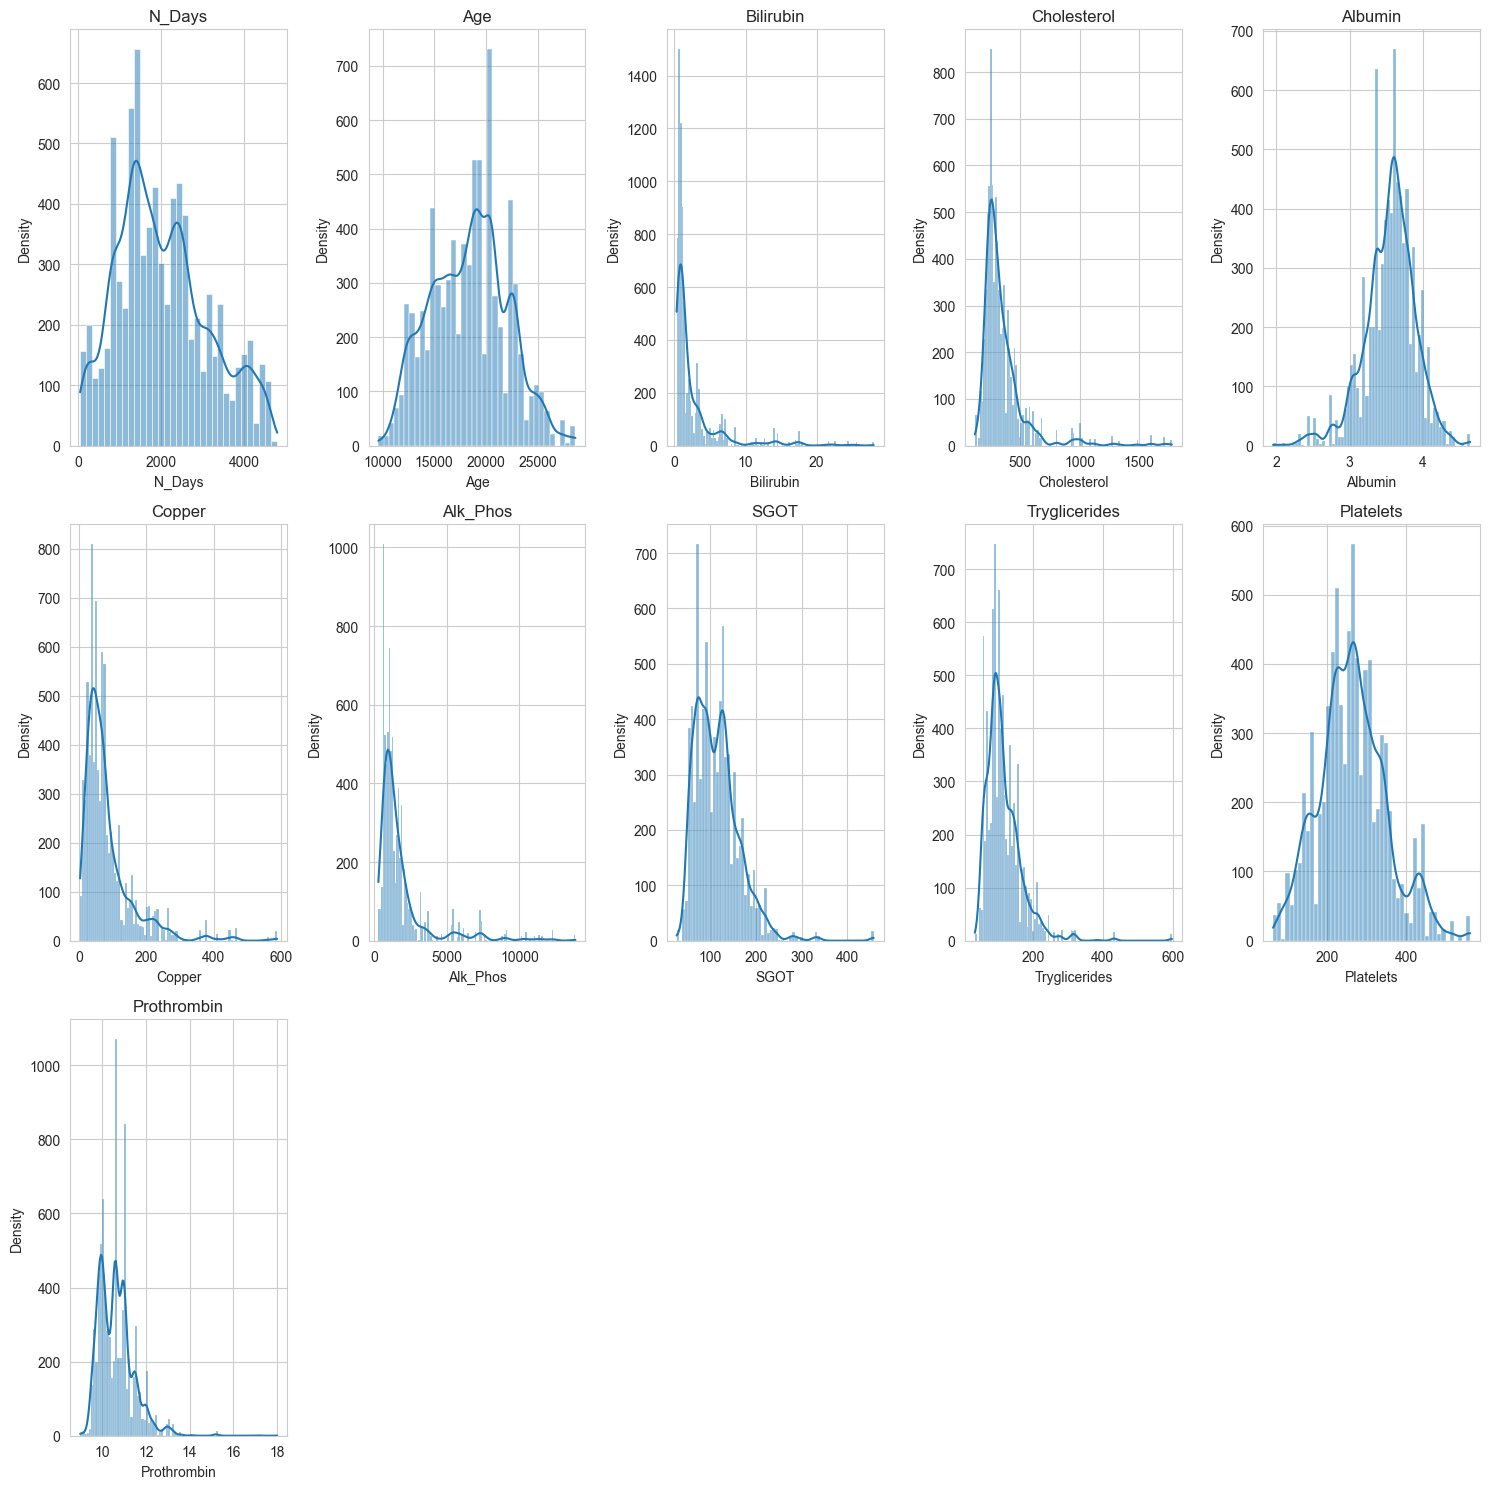

In [16]:
columns_to_plot_distribution = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper','Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
num_df = all_df.loc[:, columns_to_plot_distribution]
common.show_distribution_graph(num_df, columns_to_plot_distribution)

## 4. Univariate Analysis (Single Variable)
* Categorical variables:
    * Frequency distribution
    * Bar plots or pie charts.
* Numerical variables:
    * Histograms or box plots.
    * Distribution plots

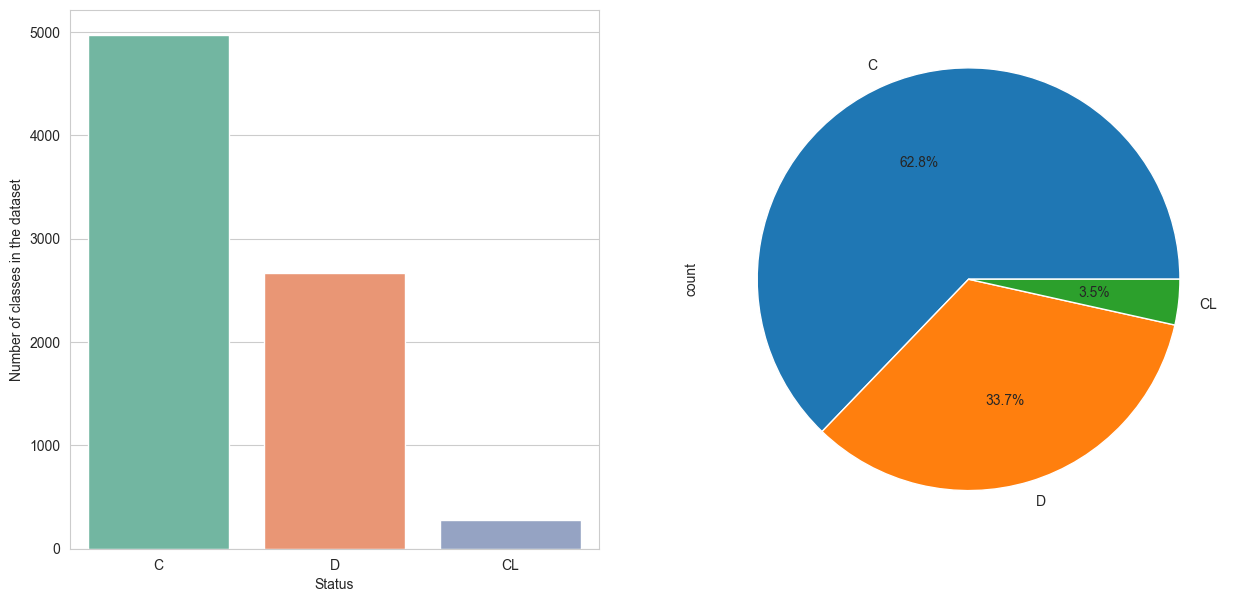

In [17]:
common.show_target_values(all_df, config['TARGET_COLUMN'])

## 5. Bivariate/Multivariate Analysis
* Correlation matrix (for numerical variables)
* Scatter plots (to assess relationships between two numerical variables)
* Pair plots (to visualize relationships across multiple variables)
* Group-wise statistics (e.g., groupby() for summarizing data by category)

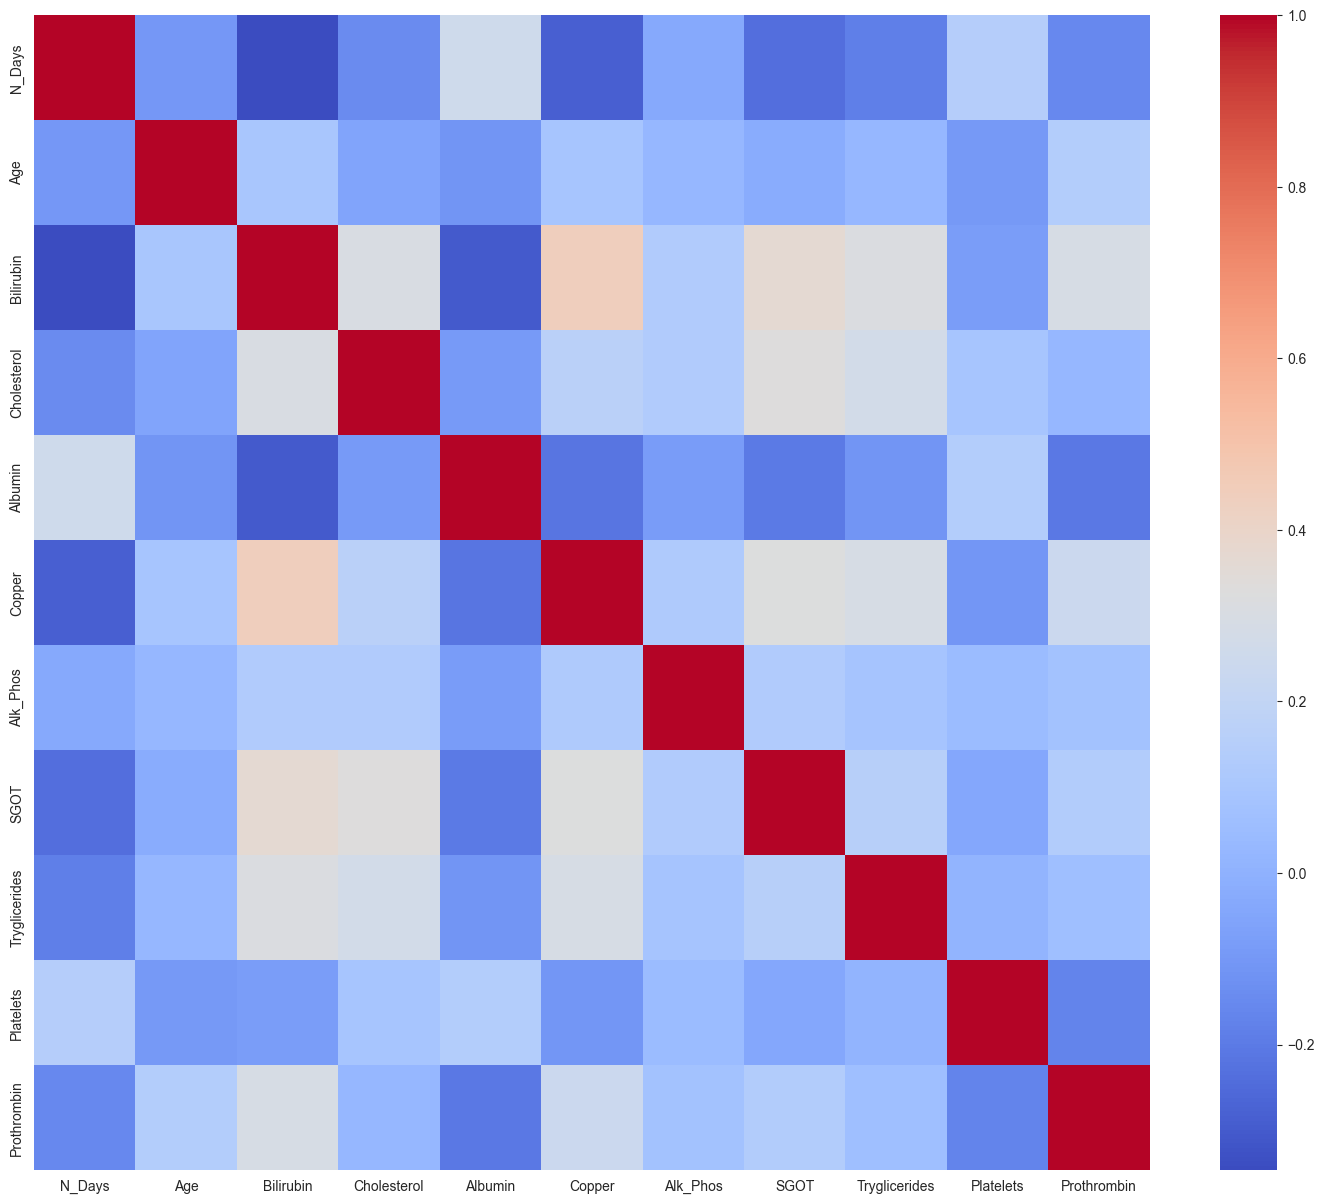

In [18]:
common.show_feature_correlation(num_df)